https://youtu.be/3yk9sBja7YI

Training custom models for segmentation using StarDist

In [1]:
!pip install stardist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 10.9 MB/s eta 0:00:00


In [23]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib
#matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt


from glob import glob
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, normalize

from stardist import fill_label_holes, random_label_cmap, calculate_extents, gputools_available
from stardist.matching import matching, matching_dataset
from stardist.models import Config2D, StarDist2D, StarDistData2D

In [24]:
np.random.seed(42)
lbl_cmap = random_label_cmap()

In [1]:
from stardist_model import load_splice, train_test_split, augmenter, StarDist, plot

X, Y = load_splice("data/masks", "data/inputs")

X_trn, Y_trn, X_val, Y_val = train_test_split(X, Y)

model = StarDist(32, False, (2,2))
model.CV(X_trn, Y_trn, X_val, Y_val, augmenter, [0.001], [5], [1])

plot(model.taus, model.scores)

100%|██████████| 135/135 [01:04<00:00,  2.10it/s]
base_model.py (149): output path for model already exists, files may be overwritten: C:\Users\abder\ml-project-2-segmentedsouls\models\stardist


number of images: 135
- training:       115
- validation:      20
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.307648, nms_thresh=0.3.
Epoch 1/5
Cause: Unable to locate the source code of <function _gcd_import at 0x0000016E9A653D80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function _gcd_import at 0x0000016E9A653D80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain th

NMS threshold = 0.5:  80%|████████  | 16/20 [00:47<00:11,  2.94s/it, 0.503 -> 0.022]


Using optimized values: prob_thresh=0.504065, nms_thresh=0.3.
Saving to 'thresholds.json'.


  0%|          | 0/20 [00:00<?, ?it/s]

[{'learning_rate': 0.001,
  'epochs': 5,
  'steps_per_epoch': 1,
  'stats': [DatasetMatching(criterion='iou', thresh=0.1, fp=49, tp=1932, fn=14332, precision=0.9752650176678446, recall=0.11878996556812592, accuracy=0.1184331514742843, f1=0.2117840504247739, n_true=16264, n_pred=1981, mean_true_score=0.11036857730991666, mean_matched_score=0.9291069054702301, panoptic_quality=0.19677002371811286, by_image=False),
   DatasetMatching(criterion='iou', thresh=0.2, fp=322, tp=3764, fn=13168, precision=0.9211943220753793, recall=0.22230096858020318, accuracy=0.2181523125072447, f1=0.3581691883147778, n_true=16932, n_pred=4086, mean_true_score=0.19459012842842965, mean_matched_score=0.8753453917508425, panoptic_quality=0.3135217484584804, by_image=False),
   DatasetMatching(criterion='iou', thresh=0.3, fp=272, tp=15, fn=7161, precision=0.05226480836236934, recall=0.0020903010033444815, accuracy=0.002013963480128894, f1=0.004019831167090982, n_true=7176, n_pred=287, mean_true_score=0.0008697220

In [44]:
"""use_gpu = True
if use_gpu:
    from csbdeep.utils.tf import limit_gpu_memory
    limit_gpu_memory(0.8)"""

"""median_size = calculate_extents(list(Y), np.median)
fov = np.array(model._axes_tile_overlap('YX'))
print(f"median object size:      {median_size}")
print(f"network field of view :  {fov}")
if any(median_size > fov):
    print("WARNING: median object size larger than field of view of the neural network.")"""

ValueError: ignored

In [ ]:
median_size = calculate_extents(list(Y), np.median)
fov = np.array(model._axes_tile_overlap('YX'))
print(f"median object size:      {median_size}")
print(f"network field of view :  {fov}")
if any(median_size > fov):
    print("WARNING: median object size larger than field of view of the neural network.")


median object size:      [121. 119.]
network field of view :  [91 92]


In [ ]:
"""
# plot some augmented examples
img, lbl = X[3],Y[3]
plot_img_label(img, lbl)
for _ in range(3):
    img_aug, lbl_aug = augmenter(img,lbl)
    plot_img_label(img_aug, lbl_aug, img_title="image augmented", lbl_title="label augmented")
"""

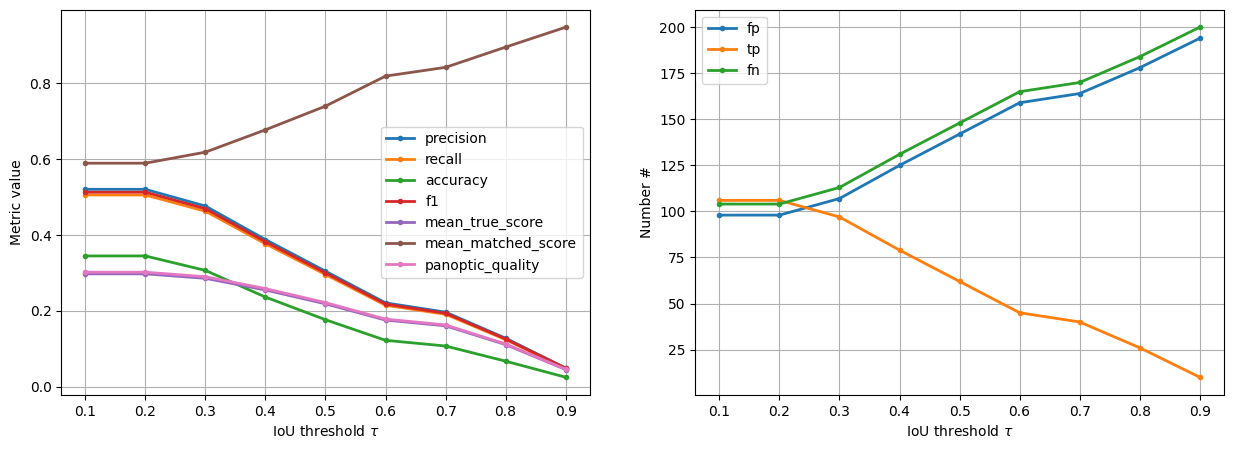

In [34]:
"""#Plot key metrics
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

for m in ('precision', 'recall', 'accuracy', 'f1', 'mean_true_score', 'mean_matched_score', 'panoptic_quality'):
    ax1.plot(taus, [s._asdict()[m] for s in stats], '.-', lw=2, label=m)
ax1.set_xlabel(r'IoU threshold $\tau$')
ax1.set_ylabel('Metric value')
ax1.grid()
ax1.legend()

for m in ('fp', 'tp', 'fn'):
    ax2.plot(taus, [s._asdict()[m] for s in stats], '.-', lw=2, label=m)
ax2.set_xlabel(r'IoU threshold $\tau$')
ax2.set_ylabel('Number #')
ax2.grid()
ax2.legend();"""

